# **JSWMM - Fossolo example**
Component:
- PreRunoff
- Runoff
- FlowRateDispatcher
- Routing

Complete documentation: https://osf.io/349vd/

### **Inputs description**
#### **General description**
The input of the model are the file <em>.inp</em> generated by EPA SWMM. The topology of the network and the sim files.
The file <em>.inp</em> collects all the network assigned properties. An example of how to generate this file is described in https://growworkinghard.altervista.org/draft-of-sewer-design/.
The topology file describes how the nodes are connected. Each node is a model solution. See the example for a better explanation.


### **PRERUNOFF COMPONENT**
#### *Inputs*
@In <b>areaName</b>: name of the area where the runoff must be evaluated;

@In <b>aLPP</b>: constant coefficient of the power law (see Output) - defined in Hello.sim;

@In <b>nLPP</b>: constant coefficient of the power law (see Output) - defined in Hello.sim;

@In <b>numberOfCurves</b>: number of curves used to evaluate the maximum (in this version must be in the range [1-3]) - defined in Hello.sim.

#### *Outputs*
@Out <b>adaptedRainfallData</b>: contains the behaviour of rainfall data. It is evaluated at 3, 5 and 10 minutes using the power law:

$$I = a\cdot tp^{(n-1)}$$

<em>a</em> and <em>n</em> are inputs of the model. <em>tp</em> is the rainfall period.

The output is an HashMap<Integer, LinkedHashMap<Instant, Double>>  where the HM key is the curve (3,5 and 10 minutes). The inner LHM contains the values of rainfall over time.

### **RUNOFF COMPONENT**
#### *Inputs*
@In <b>areaName</b>: name of the area where the runoff must be evaluated;

@In <b>nodeName</b>: name of the node where the runoff is concentrated.

#### *Outputs*
@OutNode <b>runoffFlowRate</b>: contains the response of the area to the input of rainfall. It is in the same form of the adaptedRainfallData. It is an HashMap<Integer, LinkedHashMap<Instant, Double>>  where the HM key is the curve (3,5 and 10 minutes). The inner LHM contains the values of flowrate over time.

### **FLOWRATEDISPATCHER COMPONENT**
#### *Inputs*
@InNode <b>flowRate</b>: a series of HashMap<Integer, LinkedHashMap<Instant, Double>> that bring to next node the flowrate due to the upper part of the network.

@InNode <b>dataStructure</b>: full data structure, updated to the last upper node.

#### *Outputs*
@OutNode <b>dataStructure</b>: full data structure, updated to the current upper node. In this the flow rate at the current junction is the sum of all contributes above.

### **ROUTING COMPONENT**
#### *Inputs*
@InNode <b>dataStructure</b>: full data structure, updated to the last upper node.

#### *Outputs*
@OutNode <b>routingFlowRate</b>: an HashMap<Integer, LinkedHashMap<Instant, Double>> that bring to next NET3 node the flowrate due to the upper part of the network, routed to lower junction of the conduit.

### **Outputs description**


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import os

In [17]:
###########################
### SET THE FOLDER PATH ###
###########################
projFolder = '/home/daniele/git/github/geoframecomponents/jswmm/data/winterSchool/fossoloExample/OMS_runoffRouting/'

In [18]:
os.chdir(projFolder)

In [19]:
os.listdir()

['src',
 'build.xml',
 'build',
 'nbproject',
 '.gitignore',
 'console',
 '.oms',
 'dist',
 'lib',
 'data',
 'simulation',
 'LICENSE']

In [20]:
f=open("./data/fossoloExample.inp", "r")
print(f.read())

[TITLE]
;;Project Title/Notes

[OPTIONS]
;;Option             Value
FLOW_UNITS           CMS
INFILTRATION         HORTON
FLOW_ROUTING         STEADY
LINK_OFFSETS         DEPTH
MIN_SLOPE            0
ALLOW_PONDING        NO
SKIP_STEADY_STATE    NO

START_DATE           01/01/2018
START_TIME           00:00:00
REPORT_START_DATE    01/01/2018
REPORT_START_TIME    00:00:00
END_DATE             01/01/2018
END_TIME             01:00:00
SWEEP_START          01/01
SWEEP_END            12/31
DRY_DAYS             0
REPORT_STEP          00:00:30
WET_STEP             00:01:00
DRY_STEP             01:00:00
ROUTING_STEP         0:00:30 

INERTIAL_DAMPING     PARTIAL
NORMAL_FLOW_LIMITED  BOTH
FORCE_MAIN_EQUATION  H-W
VARIABLE_STEP        0.75
LENGTHENING_STEP     0
MIN_SURFAREA         1.14
MAX_TRIALS           8
HEAD_TOLERANCE       0.0015
SYS_FLOW_TOL         5
LAT_FLOW_TOL         5
MINIMUM_STEP         0.5
THREADS              1

[EVAPORATION]
;;Data Source    Parameters
;;-------------- --------

In [21]:
f=open("./data/topo.csv", "r")
print(f.read())

1 11 
2 12
3 13
4 14
5 15
6 16
7 17
8 18
9 19
10 20
11 13
12 13
14 16
15 16
13 17
16 17
17 20
18 20
19 20
20 0


In [22]:
f=open("./simulation/Hello.sim", "r")
print(f.read())

/*
 * Hello 'world' example.
 *   A component printing a greeting.
 */
import static oms3.SimBuilder.instance as OMS3
import org.altervista.growworkinghard.jswmm.dataStructure.SWMMobject

OMS3.graph(path: "./data/topo.csv",
           simpath: "./simulation/") {
           	
	resource "$oms_prj/lib"

    graph(traverser: "downstream.all") {
    	parameter {
            "aLPP" 60.4
            "nLPP" 0.61
            "numberOfCurves" 3
        }
    }
    
    flags {
    	"1" "{overwrite}"
    	"2" "{overwrite}"
    	"3" "{overwrite}"
    	"4" "{overwrite}"
    	"5" "{overwrite}"
    	"6" "{overwrite}"
    	"7" "{overwrite}"
    	"8" "{overwrite}"
    	"9" "{overwrite}"
    	"10" "{overwrite}"
    }
    
    build()
    
    model() {
    	
        components {
            "c" "ex0.OutT"
        }
        
        parameter {
            "c.datastructure" new SWMMobject()
        }
        
        outFluxes {
            "c.datastructure" ""
        }
    } 
}



In [37]:
!docker run --rm -it -v $(pwd):/work omslab/oms simulation/Hello.sim

docker: Cannot connect to the Docker daemon at unix:///var/run/docker.sock. Is the docker daemon running?.
See 'docker run --help'.


**Read the JSWMM output**

In [78]:
nameETPTFile = 'output/Evapotranspiration_Priestley_Taylor.csv'

In [79]:
# Open with dataframe the file
dfPt= pd.read_csv(nameETPTFile,sep=',',skiprows=6,low_memory=False)
dfPt.head()

,Format,yyyy-MM-dd HH:mm,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,NaN,2010-01-01 00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,2010-01-01 01:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NaN,2010-01-01 02:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,2010-01-01 03:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NaN,2010-01-01 04:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
# Rename date column 
dfPt.rename(columns={list(dfPt)[1]:'Datetime'}, inplace=True)
dfPt[dfPt ==-9999]=np.nan

In [81]:
dfPt.head()

,Format,Datetime,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,NaN,2010-01-01 00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,2010-01-01 01:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NaN,2010-01-01 02:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,2010-01-01 03:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NaN,2010-01-01 04:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
for x in range(2, 9):
    dfPt.rename(columns={list(dfPt)[x]:x-1}, inplace=True)

In [83]:
dfPt.head()

,Format,Datetime,1,2,3,4,5,6,7
0,NaN,2010-01-01 00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,2010-01-01 01:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NaN,2010-01-01 02:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,2010-01-01 03:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NaN,2010-01-01 04:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
dfPt['Datetime'] = pd.to_datetime(dfPt['Datetime'], dayfirst=True)
dfPt['Datetime'] = dfPt['Datetime'].dt.strftime('%Y-%m-%d %H:%M')
dfPt.index = dfPt.Datetime

In [85]:
dfPt.head()

,Format,Datetime,1,2,3,4,5,6,7
Datetime,,,,,,,,,
2010-01-01 00:00,NaN,2010-01-01 00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-01-01 01:00,NaN,2010-01-01 01:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-01-01 02:00,NaN,2010-01-01 02:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-01-01 03:00,NaN,2010-01-01 03:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-01-01 04:00,NaN,2010-01-01 04:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
dfPt = dfPt.iloc[:,2:]
dfPt.head()

,1,2,3,4,5,6,7
Datetime,,,,,,,
2010-01-01 00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-01-01 01:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-01-01 02:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-01-01 03:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-01-01 04:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


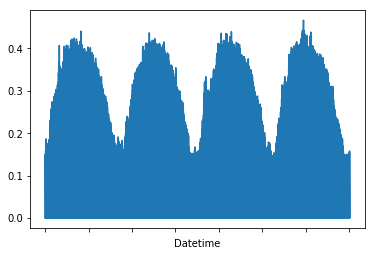

In [87]:
dfPt.iloc[:,6].plot()

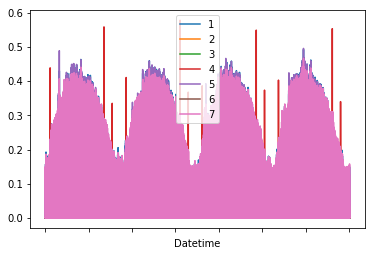

In [88]:
dfPt.plot()

**Penman-Monteith FAO**

In [15]:
# %load simulation/Evaporation\&Transpiration/ET_FAO.sim
import static oms3.SimBuilder.instance as OMS3
def home = oms_prj

def startDate	=	"2010-01-01 00:00"
def endDate		=	"2014-01-01 00:00"
def timestep = 60
OMS3.sim {
     resource "$oms_prj/lib"

 model(while:"readerTemp.doProcess") {
   components {
   		"readerTemp"			"org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorReader"
        "readerWind"			"org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorReader"
        "readerRH"          	"org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorReader"
        "readerNetRadiation"	"org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorReader"
        "readerPressure"          "org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorReader"
        //"reader_data_soilflux"          "org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorReader"
        //"reader_data_zcentroid"         "org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorReader"
        //"reader_data_press"           "org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorReader"
        "PmFao"					"etpPointCase.OmsFaoEtpHourly"
        "writer_etp"			"org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorWriter"      
   }
   parameter{  
   		// READER     
        "readerTemp.file"			"${home}/output/Kriging/TA_QC_2010_1.csv"
        "readerTemp.idfield"		"ID"  
        "readerTemp.tStart"			"${startDate}"
        "readerTemp.tEnd"			"${endDate}"
        "readerTemp.tTimestep"		"${timestep}"
        "readerTemp.fileNovalue"	"-9999"

        "readerWind.file"			"${home}/data/csv/OMSdf_WIND_QC.csv"
        "readerWind.idfield"		"ID"  
        "readerWind.tStart"			"${startDate}"
        "readerWind.tEnd"			"${endDate}"
        "readerWind.tTimestep"		"${timestep}"
        "readerWind.fileNovalue"	"-9999"
        
        "readerRH.file"         	"${home}/data/csv/OMSdf_RH_QC.csv"
        "readerRH.idfield"      	"ID"  
        "readerRH.tStart"       	"${startDate}"
        "readerRH.tEnd"         	"${endDate}"
        "readerRH.tTimestep"    	"${timestep}"
        "readerRH.fileNovalue"  	"-9999"
        
        "readerNetRadiation.file"        "${home}/output/Radiation/NetRadiation.csv" 
        "readerNetRadiation.idfield"     "ID"
        "readerNetRadiation.tStart"      "${startDate}"
        "readerNetRadiation.tEnd"        "${endDate}"
        "readerNetRadiation.tTimestep"   "${timestep}"
        "readerNetRadiation.fileNovalue" "-9999"
      
        "readerPressure.file"         "${home}/data/csv/OMSdf_PRES.csv"
        "readerPressure.idfield"      "ID"  
        "readerPressure.tStart"       "${startDate}"
        "readerPressure.tEnd"         "${endDate}"
        "readerPressure.tTimestep"    "${timestep}"
        "readerPressure.fileNovalue"  "-9999.0"
      //  "reader_data_soilflux.file"         "${home}/data/SoilFlux.csv"
      //  "reader_data_soilflux.idfield"      "ID"  
      //  "reader_data_soilflux.tStart"       "${startDate}"
      //  "reader_data_soilflux.tEnd"         "${endDate}"
       // "reader_data_soilflux.tTimestep"    60*24
      //  "reader_data_soilflux.fileNovalue"  "-9999.0"
        
        // WRITER
        "writer_etp.file"        		"${home}/output/ET_penmanFao.csv" 
        "writer_etp.tStart"       		"${startDate}"
        "writer_etp.tTimestep"   		"${timestep}"
        }
        connect {
        	"readerTemp.outData"			"PmFao.inTemp"
        	"readerWind.outData"  			"PmFao.inWind"
        	"readerRH.outData"  			"PmFao.inRh"
        	"readerNetRadiation.outData" 	"PmFao.inNetradiation"
        	"readerPressure.outData"   		"PmFao.inPressure"
        //	"reader_data_soilflux.outData"   	"PMEtpDaily.inSoilFlux"
        	"PmFao.outFaoEtp"			"writer_etp.inData"
        	}
        }
    }


SyntaxError: invalid syntax (<ipython-input-15-34a8ca0dab32>, line 2)

In [18]:
!docker run --rm -it -v $(pwd):/work omslab/oms simulation/Evaporation\&Transpiration/ET_FAO.sim

build/ folder exists: project already built.

*********************************
***     END OF SIMULATION     ***
*********************************



**Read the FAO output**

In [89]:
nameFaoFile = 'output/ET_penmanFao.csv'

In [90]:
# Open with dataframe the file
dfFao= pd.read_csv(nameFaoFile,sep=',',skiprows=6,low_memory=False)
dfFao.head()

,Format,yyyy-MM-dd HH:mm,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,NaN,2010-01-01 00:00,-9999.0,0.000024,-9999.0,-9999.0,-9999.0,0.000006,-9999.0
1,NaN,2010-01-01 01:00,-9999.0,0.000012,-9999.0,-9999.0,-9999.0,0.000005,-9999.0
2,NaN,2010-01-01 02:00,-9999.0,0.000015,-9999.0,-9999.0,-9999.0,0.000007,-9999.0
3,NaN,2010-01-01 03:00,-9999.0,0.000008,-9999.0,-9999.0,-9999.0,0.000008,-9999.0
4,NaN,2010-01-01 04:00,-9999.0,0.000009,-9999.0,-9999.0,-9999.0,0.000010,-9999.0


#### Rename date column 

In [91]:
dfFao.rename(columns={list(dfFao)[1]:'Datetime'}, inplace=True)
dfFao[dfFao ==-9999]=np.nan

In [92]:
dfFao.head()

,Format,Datetime,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,NaN,2010-01-01 00:00,NaN,0.000024,NaN,NaN,NaN,0.000006,NaN
1,NaN,2010-01-01 01:00,NaN,0.000012,NaN,NaN,NaN,0.000005,NaN
2,NaN,2010-01-01 02:00,NaN,0.000015,NaN,NaN,NaN,0.000007,NaN
3,NaN,2010-01-01 03:00,NaN,0.000008,NaN,NaN,NaN,0.000008,NaN
4,NaN,2010-01-01 04:00,NaN,0.000009,NaN,NaN,NaN,0.000010,NaN


In [102]:
for x in range(2, 9):
    dfFao.rename(columns={list(dfFao)[x]:x-1}, inplace=True)

In [103]:
dfFao.head()

,Format,Datetime,1,2,3,4,5,6,7
Datetime,,,,,,,,,
2010-01-01 00:00,NaN,2010-01-01 00:00,NaN,0.000024,NaN,NaN,NaN,0.000006,NaN
2010-01-01 01:00,NaN,2010-01-01 01:00,NaN,0.000012,NaN,NaN,NaN,0.000005,NaN
2010-01-01 02:00,NaN,2010-01-01 02:00,NaN,0.000015,NaN,NaN,NaN,0.000007,NaN
2010-01-01 03:00,NaN,2010-01-01 03:00,NaN,0.000008,NaN,NaN,NaN,0.000008,NaN
2010-01-01 04:00,NaN,2010-01-01 04:00,NaN,0.000009,NaN,NaN,NaN,0.000010,NaN


In [104]:
dfFao['Datetime'] = pd.to_datetime(dfFao['Datetime'], dayfirst=True)
dfFao['Datetime'] = dfFao['Datetime'].dt.strftime('%Y-%m-%d %H:%M')
dfFao.index = dfFao.Datetime

In [105]:
dfFao.head()

,Format,Datetime,1,2,3,4,5,6,7
Datetime,,,,,,,,,
2010-01-01 00:00,NaN,2010-01-01 00:00,NaN,0.000024,NaN,NaN,NaN,0.000006,NaN
2010-01-01 01:00,NaN,2010-01-01 01:00,NaN,0.000012,NaN,NaN,NaN,0.000005,NaN
2010-01-01 02:00,NaN,2010-01-01 02:00,NaN,0.000015,NaN,NaN,NaN,0.000007,NaN
2010-01-01 03:00,NaN,2010-01-01 03:00,NaN,0.000008,NaN,NaN,NaN,0.000008,NaN
2010-01-01 04:00,NaN,2010-01-01 04:00,NaN,0.000009,NaN,NaN,NaN,0.000010,NaN


In [106]:
dfFao = dfFao.iloc[:,2:]
dfFao.head()

,1,2,3,4,5,6,7
Datetime,,,,,,,
2010-01-01 00:00,NaN,0.000024,NaN,NaN,NaN,0.000006,NaN
2010-01-01 01:00,NaN,0.000012,NaN,NaN,NaN,0.000005,NaN
2010-01-01 02:00,NaN,0.000015,NaN,NaN,NaN,0.000007,NaN
2010-01-01 03:00,NaN,0.000008,NaN,NaN,NaN,0.000008,NaN
2010-01-01 04:00,NaN,0.000009,NaN,NaN,NaN,0.000010,NaN


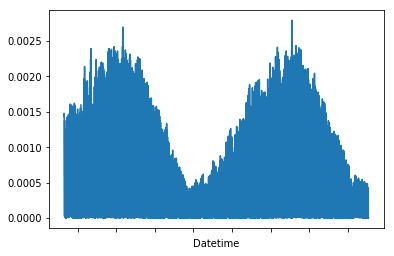

In [107]:
dfFao.iloc[:,6].plot()

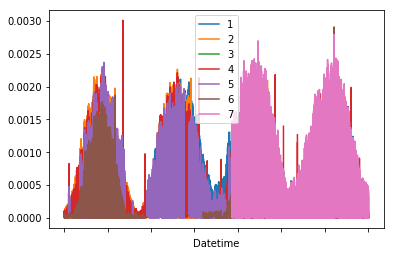

In [109]:
dfFao.plot()

## **Schymanski \& Or**
This component compute the transpiration. Actually there is not a component documentation, will be provided soon on http://geoframe.blogspot.com/


### **Component Description**
For the mathematical description of this component, please refer to https://www.hydrol-earth-syst-sci.net/21/685/2017/hess-21-685-2017.pdf


### **Transpiration is different from evapotranspiration**


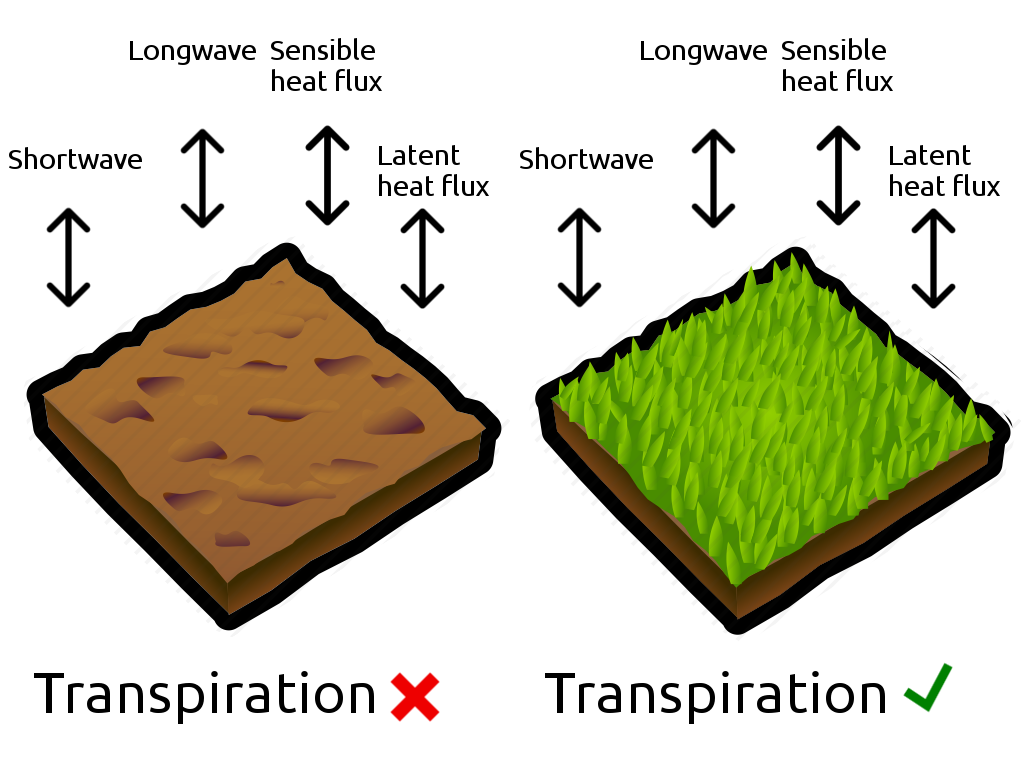

In [27]:
Image('fluxes.png')

Input required:
- Air temperature
- Relative humidity
- Wind velocity
- Shortwave direct radiation
- Shortwave diffuse radiation
- Longwave radiation
- Atmospheric pressure
- Leaf Area Index (LAI)
- Stress factor
- Soil Flux
- Centroids
- Dem
- Soil water content
- Type of canopy model:
    - Flatsurface (Transpiring surface = 1)
    - Grassland (Transpiring surface = LAI)
    - MultilayerCanopy (Transpiring surface = multilayer canopy model)
    
Output:
- Latent heat both for sunlight and shaded canopy [$W/m^{2}$]
- Sensible heat both for sunlight and shaded canopy [$W/m^{2}$]
- Leaves temperature both for sunlight and shaded canopy [$W/m^{2}$]
- Total transpiration [$mm$]
- Fraction of highlighted canopy [-]
- Shortwave radiation absorbed both for sunlight and shaded canopy [$W/m^{2}$]

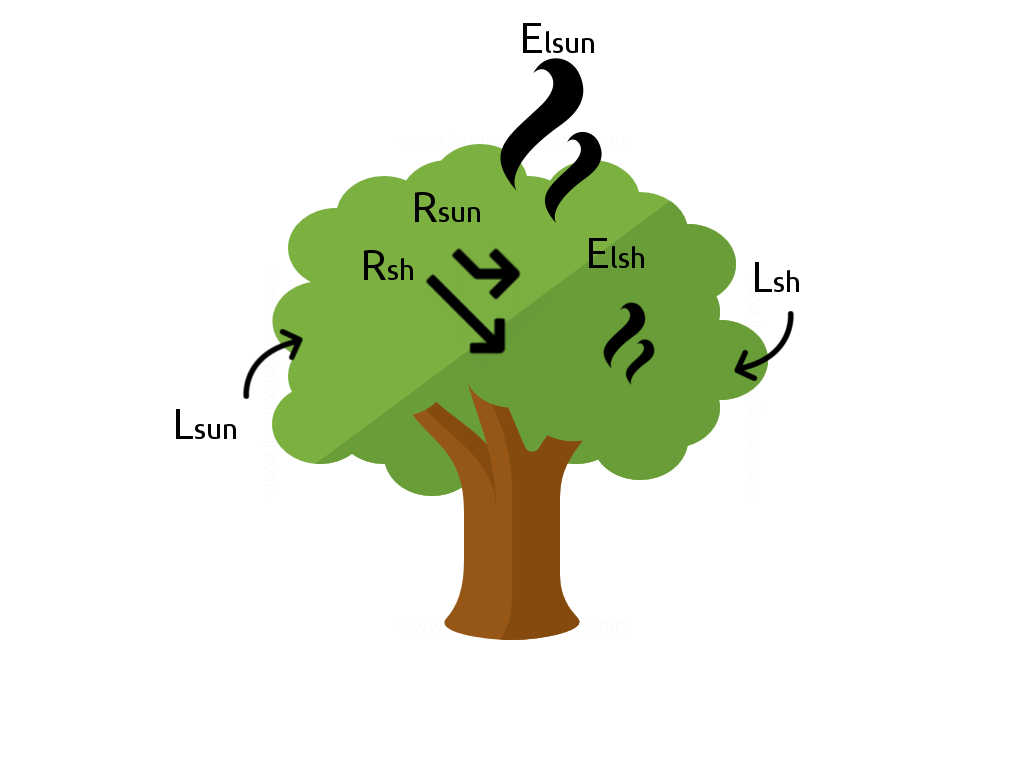

In [28]:
Image("canopy.png")

In [43]:
os.chdir(projFolder)

In [46]:
# %load simulation/Evaporation\&Transpiration/Transpiration.sim
import static oms3.SimBuilder.instance as OMS3
import static oms3.SimBuilder.*
def home = oms_prj

def startDate	=	"2010-01-01 00:00"
def endDate		=	"2014-01-01 00:00"
OMS3.sim {
	resource "$oms_prj/lib"
	model(while:"readerDataTemperature.doProcess") {
		components {
			"readerDem"                  				"org.jgrasstools.gears.io.rasterreader.OmsRasterReader"     
			"readerDataTemperature"           			"org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorReader"
			"readerDataWind"             				"org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorReader"
			"readerDataHumidity"          				"org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorReader"
			"readerDataShortWaveDirect"         		"org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorReader"
			"readerDataShortWaveDiffuse"         		"org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorReader"
			"readerDataLongWave"         				"org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorReader"
			"readerDataPressure"          				"org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorReader"
			"readerDataLeafAreaIndex"          			"org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorReader"	
			"readerCentroids"							"org.jgrasstools.gears.io.shapefile.OmsShapefileFeatureReader"		       
			"Transpiration"                    			"etpPointCase.OmsTranspiration"   
			
			
			"writerLatentHeatSun"                  		"org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorWriter"  
			"writerLatentHeatShadow"               		"org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorWriter"  
			"writerTranspiration"                  		"org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorWriter"  
			
			"writerSensibleSun"                  		"org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorWriter"  
			"writerSensibleShadow"               		"org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorWriter"  
			
			"writerLeafTemperatureSun"					"org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorWriter" 
			"writerLeafTemperatureSh"					"org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorWriter" 
			
			"writerCanopy"								"org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorWriter"      
			"writerRadSun"								"org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorWriter"           
			"writerRadShadow"							"org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorWriter"           
			
			}
			parameter{  			
				"readerDataTemperature.file"          	"${home}/output/Kriging/TA_QC_2010_1.csv"
				"readerDataTemperature.idfield"       	"ID"  
				"readerDataTemperature.tStart"        	"${startDate}"
				"readerDataTemperature.tEnd"			"${endDate}"
				"readerDataTemperature.tTimestep"		60
				"readerDataTemperature.fileNovalue"   	"-9999.0"				        		
				
				"Transpiration.doHourly"				true    
				"Transpiration.typeOfTerrainCover"		"FlatSurface"
				//"Transpiration.typeOfTerrainCover"		"Grassland"
				//"Transpiration.typeOfTerrainCover"		"MultiLayersCanopy"

				"Transpiration.doFullPrint"				true   // Print all the output  
                                                         // if false print only transpiration and latent heat

				"Transpiration.tStartDate"				"${startDate}"   
				"readerDem.file"						"${home}/data/DemMeledrioCut.asc"				   	
				
				"readerDataWind.file"         			"${home}/output/Kriging/WIND_QC_2010_1.csv"
				"readerDataWind.idfield"				"ID"  
				"readerDataWind.tStart"       			"${startDate}"
				"readerDataWind.tEnd"         			"${endDate}"
				"readerDataWind.tTimestep"    			60
				"readerDataWind.fileNovalue"  			"-9999.0"        
				
				"readerDataHumidity.file"         		"${home}/output/Kriging/RH_QC_2010_1.csv"
				"readerDataHumidity.idfield"      		"ID"  
				"readerDataHumidity.tStart"       		"${startDate}"
				"readerDataHumidity.tEnd"         		"${endDate}"
				"readerDataHumidity.tTimestep"    		60
				"readerDataHumidity.fileNovalue"  		"-9999.0"	
				
				"readerDataShortWaveDirect.file"		"${home}/output/Radiation/ShortwaveDirect.csv"
				"readerDataShortWaveDirect.idfield"		"ID"
				"readerDataShortWaveDirect.tStart"		"${startDate}"
				"readerDataShortWaveDirect.tEnd"		"${endDate}"
				"readerDataShortWaveDirect.tTimestep"	60 
				"readerDataShortWaveDirect.fileNovalue"	"-9999.0"				
				
				"readerDataShortWaveDiffuse.file"		"${home}/output/Radiation/ShortwaveDiffuse.csv"
				"readerDataShortWaveDiffuse.idfield"	"ID"
				"readerDataShortWaveDiffuse.tStart"		"${startDate}"
				"readerDataShortWaveDiffuse.tEnd"		"${endDate}"
				"readerDataShortWaveDiffuse.tTimestep"	60 
				"readerDataShortWaveDiffuse.fileNovalue""-9999.0"				
				
				"readerDataLongWave.file"        		"${home}/output/Radiation/LongwaveDownwelling_Model6.csv" 
				"readerDataLongWave.idfield"     		"ID"
				"readerDataLongWave.tStart"      		"${startDate}"
				"readerDataLongWave.tEnd"        		"${endDate}"
				"readerDataLongWave.tTimestep"   		60  
				"readerDataLongWave.fileNovalue" 		"-9999.0"
				
				"readerDataPressure.file"         		"${home}/data/csv/OMSdf_PRES.csv"
				"readerDataPressure.idfield"      		"ID"  
				"readerDataPressure.tStart"       		"${startDate}"
				"readerDataPressure.tEnd"         		"${endDate}"
				"readerDataPressure.tTimestep"    		60
				"readerDataPressure.fileNovalue"  		"-9999.0"       
				
				"readerDataLeafAreaIndex.file"         	"${home}/data/csv/OMSdf_LAI.csv"
				"readerDataLeafAreaIndex.idfield"      	"ID"  
				"readerDataLeafAreaIndex.tStart"       	"${startDate}"
				"readerDataLeafAreaIndex.tEnd"         	"${endDate}"
				"readerDataLeafAreaIndex.tTimestep"    	60
				"readerDataLeafAreaIndex.fileNovalue"  	"-9999.0"        				
				
				"readerCentroids.file"					"${home}/output/Geomorphology/centroid.shp"
				"Transpiration.idCentroids"            	"ID"
				"Transpiration.centroidElevation"		"Elevation"
				
				                  		
				"writerLatentHeatSun.file"        		"${home}/output/ET/El_SO_Sun.csv" 
				"writerLatentHeatSun.tStart"       		"${startDate}"
				"writerLatentHeatSun.tTimestep"   		60
				
				"writerLatentHeatShadow.file"        	"${home}/output/ET/El_SO_Sh.csv" 
				"writerLatentHeatShadow.tStart"       	"${startDate}"
				"writerLatentHeatShadow.tTimestep"   	60
							        		        
				"writerTranspiration.file"        		"${home}/output/ET/ETP_SO.csv" 
				"writerTranspiration.tStart"       		"${startDate}"
				"writerTranspiration.tTimestep"   		60
							        
				"writerLeafTemperatureSun.file"			"${home}/output/ET/LT_SO_Sun.csv" 
				"writerLeafTemperatureSun.tStart"			"${startDate}"
				"writerLeafTemperatureSun.tTimestep"		60       
				
				"writerLeafTemperatureSh.file"			"${home}/output/ET/LT_SO_Sh.csv" 
				"writerLeafTemperatureSh.tStart"			"${startDate}"
				"writerLeafTemperatureSh.tTimestep"		60       
				
				"writerRadSun.file"						"${home}/output/ET/RAD_SO_Sun.csv" 
				"writerRadSun.tStart"					"${startDate}"
				"writerRadSun.tTimestep"				60       
				
				"writerRadShadow.file"					"${home}/output/ET/RAD_SO_Sh.csv" 
				"writerRadShadow.tStart"				"${startDate}"
				"writerRadShadow.tTimestep"				60       
				
				"writerCanopy.file"						"${home}/output/ET/CANOPY_SO_Sun.csv" 
				"writerCanopy.tStart"					"${startDate}"
				"writerCanopy.tTimestep"				60       
				
				"writerSensibleSun.file"				"${home}/output/ET/HL_SO_Sun.csv" 
				"writerSensibleSun.tStart"				"${startDate}"
				"writerSensibleSun.tTimestep"			60       
				
				"writerSensibleShadow.file"				"${home}/output/ET/HL_SO_Sh.csv" 
				"writerSensibleShadow.tStart"			"${startDate}"
				"writerSensibleShadow.tTimestep"		60        
			
				}
				connect {
					"readerDataTemperature.outData"		"Transpiration.inAirTemperature"
					"readerDem.outRaster"				"Transpiration.inDem"    
					"readerDataWind.outData"  			"Transpiration.inWindVelocity"
					"readerDataHumidity.outData"  		"Transpiration.inRelativeHumidity"
					"readerDataShortWaveDirect.outData" "Transpiration.inShortWaveRadiationDirect"
					"readerDataShortWaveDiffuse.outData""Transpiration.inShortWaveRadiationDiffuse"
					"readerDataLongWave.outData" 		"Transpiration.inLongWaveRadiation"
					"readerDataPressure.outData"		"Transpiration.inAtmosphericPressure"
					"readerDataLeafAreaIndex.outData"	"Transpiration.inLeafAreaIndex"	
					"readerCentroids.geodata"			"Transpiration.inCentroids"		
			
					"Transpiration.outLatentHeatSun"	"writerLatentHeatSun.inData"	        			        	
					"Transpiration.outLatentHeatShadow"	"writerLatentHeatShadow.inData"	        			        	
					"Transpiration.outTranspiration"	"writerTranspiration.inData"
					
					"Transpiration.outSensibleHeatSun"	"writerSensibleSun.inData"
					"Transpiration.outSensibleHeatShadow"	"writerSensibleShadow.inData"
					
					"Transpiration.outLeafTemperatureSun"	"writerLeafTemperatureSun.inData"
					"Transpiration.outLeafTemperatureShadow"	"writerLeafTemperatureSh.inData"
					
					"Transpiration.outRadiationSun"		"writerRadSun.inData"
					"Transpiration.outRadiationShadow"	"writerRadShadow.inData"
					
					"Transpiration.outCanopy"			"writerCanopy.inData"
					
					}
			}
	}


In [46]:
!docker run --rm -it -v $(pwd):/work omslab/oms simulation/Evaporation\&Transpiration/Transpiration.sim

build/ folder exists: project already built.
Reading coverage: DemMeledrioCut.asc
Reading features from shapefile: centroid.shp
Finished.
Finished.

*********************************
***     END OF SIMULATION     ***
*********************************



**Read the SO output**

In [47]:
nameEtpFile = 'output/ET/ETP_SO.csv'

In [48]:
# Open with dataframe the file
dfEtp= pd.read_csv(nameEtpFile,sep=',',skiprows=6,low_memory=False)
dfEtp.head()

,Format,yyyy-MM-dd HH:mm,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,NaN,2010-01-01 00:00,0.008202,0.028858,0.025728,0.027405,0.010789,0.016557,0.012207
1,NaN,2010-01-01 01:00,0.007881,0.021216,0.022367,0.022520,0.008975,0.013973,0.011121
2,NaN,2010-01-01 02:00,0.008082,0.020197,0.019776,0.020484,0.009724,0.013459,0.010521
3,NaN,2010-01-01 03:00,0.007384,0.017277,0.017952,0.020450,0.008976,0.013771,0.009931
4,NaN,2010-01-01 04:00,0.007921,0.017815,0.019098,0.020558,0.009219,0.014556,0.010251


#### Rename date column 

In [49]:
dfEtp.rename(columns={list(dfEtp)[1]:'Datetime'}, inplace=True)
dfEtp[dfEtp ==-9999]=np.nan

In [50]:
dfEtp.head()

,Format,Datetime,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,NaN,2010-01-01 00:00,0.008202,0.028858,0.025728,0.027405,0.010789,0.016557,0.012207
1,NaN,2010-01-01 01:00,0.007881,0.021216,0.022367,0.022520,0.008975,0.013973,0.011121
2,NaN,2010-01-01 02:00,0.008082,0.020197,0.019776,0.020484,0.009724,0.013459,0.010521
3,NaN,2010-01-01 03:00,0.007384,0.017277,0.017952,0.020450,0.008976,0.013771,0.009931
4,NaN,2010-01-01 04:00,0.007921,0.017815,0.019098,0.020558,0.009219,0.014556,0.010251


In [51]:
for x in range(2, 9):
    dfEtp.rename(columns={list(dfEtp)[x]:x-1}, inplace=True)

In [52]:
dfEtp.head()

,Format,Datetime,1,2,3,4,5,6,7
0,NaN,2010-01-01 00:00,0.008202,0.028858,0.025728,0.027405,0.010789,0.016557,0.012207
1,NaN,2010-01-01 01:00,0.007881,0.021216,0.022367,0.022520,0.008975,0.013973,0.011121
2,NaN,2010-01-01 02:00,0.008082,0.020197,0.019776,0.020484,0.009724,0.013459,0.010521
3,NaN,2010-01-01 03:00,0.007384,0.017277,0.017952,0.020450,0.008976,0.013771,0.009931
4,NaN,2010-01-01 04:00,0.007921,0.017815,0.019098,0.020558,0.009219,0.014556,0.010251


In [53]:
dfEtp['Datetime'] = pd.to_datetime(dfEtp['Datetime'], dayfirst=True)
dfEtp['Datetime'] = dfEtp['Datetime'].dt.strftime('%Y-%m-%d %H:%M')
dfEtp.index = dfEtp.Datetime

In [54]:
dfEtp.head()

,Format,Datetime,1,2,3,4,5,6,7
Datetime,,,,,,,,,
2010-01-01 00:00,NaN,2010-01-01 00:00,0.008202,0.028858,0.025728,0.027405,0.010789,0.016557,0.012207
2010-01-01 01:00,NaN,2010-01-01 01:00,0.007881,0.021216,0.022367,0.022520,0.008975,0.013973,0.011121
2010-01-01 02:00,NaN,2010-01-01 02:00,0.008082,0.020197,0.019776,0.020484,0.009724,0.013459,0.010521
2010-01-01 03:00,NaN,2010-01-01 03:00,0.007384,0.017277,0.017952,0.020450,0.008976,0.013771,0.009931
2010-01-01 04:00,NaN,2010-01-01 04:00,0.007921,0.017815,0.019098,0.020558,0.009219,0.014556,0.010251


In [55]:
dfEtp = dfEtp.iloc[:,2:]
dfEtp.head()

,1,2,3,4,5,6,7
Datetime,,,,,,,
2010-01-01 00:00,0.008202,0.028858,0.025728,0.027405,0.010789,0.016557,0.012207
2010-01-01 01:00,0.007881,0.021216,0.022367,0.022520,0.008975,0.013973,0.011121
2010-01-01 02:00,0.008082,0.020197,0.019776,0.020484,0.009724,0.013459,0.010521
2010-01-01 03:00,0.007384,0.017277,0.017952,0.020450,0.008976,0.013771,0.009931
2010-01-01 04:00,0.007921,0.017815,0.019098,0.020558,0.009219,0.014556,0.010251


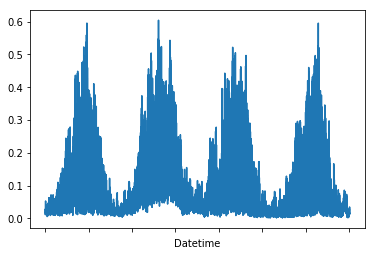

In [56]:
dfEtp.iloc[:,5].plot()

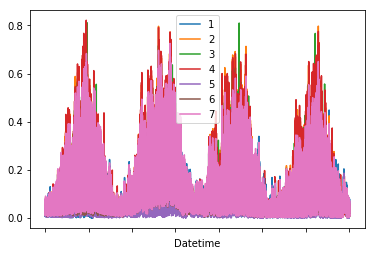

In [57]:
dfEtp.plot()

In [110]:
dfPt.head()

,1,2,3,4,5,6,7
Datetime,,,,,,,
2010-01-01 00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-01-01 01:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-01-01 02:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-01-01 03:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-01-01 04:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [111]:
dfFao.head()

,1,2,3,4,5,6,7
Datetime,,,,,,,
2010-01-01 00:00,NaN,0.000024,NaN,NaN,NaN,0.000006,NaN
2010-01-01 01:00,NaN,0.000012,NaN,NaN,NaN,0.000005,NaN
2010-01-01 02:00,NaN,0.000015,NaN,NaN,NaN,0.000007,NaN
2010-01-01 03:00,NaN,0.000008,NaN,NaN,NaN,0.000008,NaN
2010-01-01 04:00,NaN,0.000009,NaN,NaN,NaN,0.000010,NaN


In [115]:
dfET =  pd.concat([dfFao.iloc[:,5],dfPt.iloc[:,5],dfEtp.iloc[:,5]], axis=1, sort=False)
dfET.head()

,6,6,6
Datetime,,,
2010-01-01 00:00,0.000006,0.0,0.016557
2010-01-01 01:00,0.000005,0.0,0.013973
2010-01-01 02:00,0.000007,0.0,0.013459
2010-01-01 03:00,0.000008,0.0,0.013771
2010-01-01 04:00,0.000010,0.0,0.014556


In [124]:
dfET.columns=['Fao','Pt','So']
dfET.head()

,Fao,Pt,So
Datetime,,,
2010-01-01 00:00,0.000006,0.0,0.016557
2010-01-01 01:00,0.000005,0.0,0.013973
2010-01-01 02:00,0.000007,0.0,0.013459
2010-01-01 03:00,0.000008,0.0,0.013771
2010-01-01 04:00,0.000010,0.0,0.014556


In [130]:
mask = (dfET.index > '2010-07-01 00:00') & (dfET.index <= '2010-07-30 00:00')
dfETMonth = dfET.loc[mask]

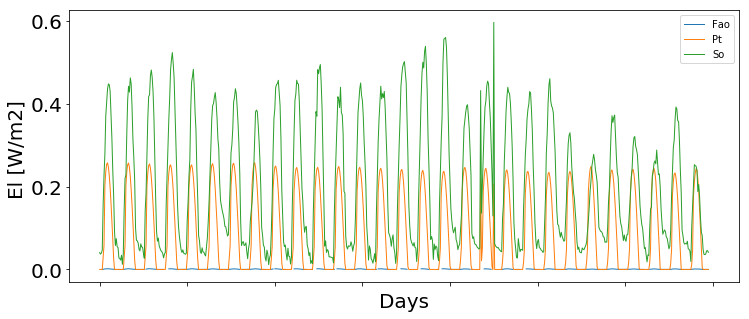

In [131]:
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(111)
dfETMonth.plot(ax=ax1, y=['Fao','Pt','So'],kind='line', stacked=False, label=['Fao','Pt','So'],linewidth=1)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)


ax1.legend(loc=1)
plt.xlabel('Days',fontsize=20)
ax1.set_ylabel('El [W/m2] ',fontsize=20)
plt.show()